# Quarteto de Anscombe

**Trabalho 2 de Visualização da Informação**

**Por: Vitória Guardieiro**

Escolhi utilizar o Python, por ser a linguagem que estou mais acostumada a usar, o que facilita o aprendizado e também faz com que consiga aplicar melhor as tecnicas aprendidas em trabalhos futuros que pretendo fazer.

Dado essa escolha, decidi utilizar as bibliotecas Matplotlib/Pyplot e Seaborn, por interagirem bem com o formato de DataFrames da biblioteca Pandas, amplamente utilizada na área em que pretendo aplicar. O Seaborn utiliza do Matplotlib para gerar algumas visualizações, então a utilização dos dois conjuntamente se tornou necessária. Mas mais do que isso, uma das vantagens do Matplotlib/Pyplot é a facilidade em criar plots simples rapidamente, com diversas personalizações, enquanto que o Seaborn apresenta várias facilidades para criação de gráficos mais complexos com uma única função utilizando um DataFrame, o que faz com que as bibliotecas se complementem bem em relação a aplicação.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
# Defino os dados
x = [10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5]
y1 = [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68]
y2 = [9.14, 8.14, 8.74, 8.77, 9.26, 8.10, 6.13, 3.10, 9.13, 7.26, 4.74]
y3 = [7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73]
x4 = [8, 8, 8, 8, 8, 8, 8, 19, 8, 8, 8]
y4 = [6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.50, 5.56, 7.91, 6.89]

In [3]:
# Para indicar os plots numerados de I a IV
datasets = {
    'I': (x, y1),
    'II': (x, y2),
    'III': (x, y3),
    'IV': (x4, y4)
}

## 1. Pyplot

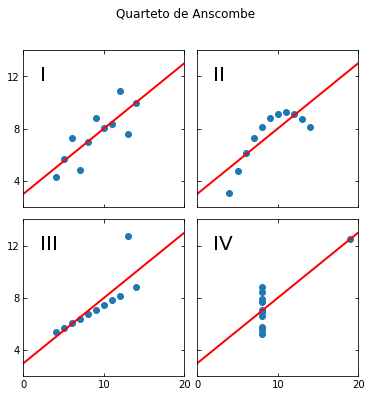

In [4]:
# Crio a figura onde será plotado, já contendo quatro subplots
fig, axs = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(6, 6),
                        gridspec_kw={'wspace': 0.08, 'hspace': 0.08})

# Adiciono o título da imagem
fig.suptitle("Quarteto de Anscombe")

# Defino os limites de eixo horizontal e vertical
axs[0, 0].set(xlim=(0, 20), ylim=(2, 14))
axs[0, 0].set(xticks=(0, 10, 20), yticks=(4, 8, 12))

for ax, (label, (x, y)), i in zip(axs.flat, datasets.items(), range(4)):
    # Adiciono a indicação de qual plot é (de I a IV)
    ax.text(0.1, 0.9, label, fontsize=20, transform=ax.transAxes, va='top')
    ax.tick_params(direction='in', top=True, right=True)
    
    # Ploto os pontos dos dados (em azul)
    ax.plot(x, y, 'o')

    # Faço a reregressão linear dos dados
    p1, p0 = np.polyfit(x, y, deg=1)
    x_lin = np.array([0, 20])
    y_lin = p1 * x_lin + p0
    
    # Ploto a linha da regressão linear
    ax.plot(x_lin, y_lin, 'r-', lw=2)
    
# Mostro a figura final com os plots
plt.show()

## 2. Seaborn

In [5]:
import seaborn as sns
import matplotlib
sns.set(style="ticks")

In [6]:
# O seaborn já possui o dataset Anscombe, então vamos importá-lo
df = sns.load_dataset("anscombe")

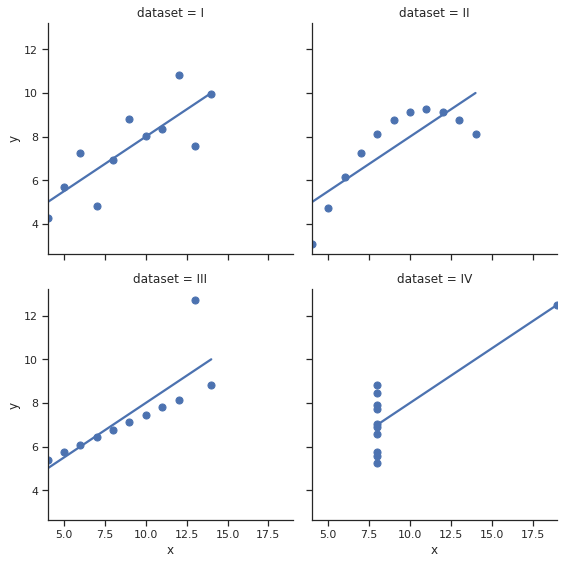

In [7]:
# Com o formato de dataset do pandas, podemos gerar os plots com a função lmplot
r = sns.lmplot(
    x="x",
    y="y",
    col="dataset",
    data=df,
    col_wrap=2,
    ci=None,
    palette="muted",
    height=4,
    scatter_kws={"s": 50, "alpha": 1})

matplotlib.pyplot.show(r)